## Homework 5 : Bayes Theorem

In [27]:
import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt 
%matplotlib inline

In [28]:
bkgd = stats.norm.rvs(loc = 0, scale=3, size = 1000000)

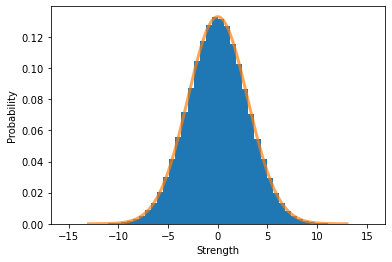

In [29]:
fig, ax = plt.subplots(1, 1)
ax.hist(bkgd,50, density=True)
#plt.xlim([2.95,3.05])
x = np.linspace(-13,13,1000)
ax.plot(x,stats.norm.pdf(x,loc = 0, scale = 3),linewidth = 3,alpha = 0.7)
plt.xlabel("Strength")
plt.ylabel("Probability")
plt.show()

#### Throwing a uniform signal

In [30]:
signal=np.random.uniform(0,20,1000000)

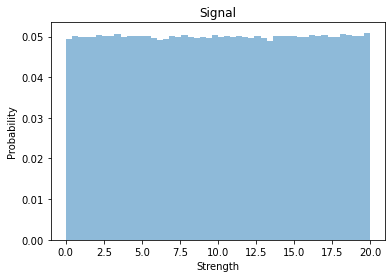

In [31]:
plt.hist(signal,bins=50,alpha=0.5,density=True)
plt.xlabel("Strength")
plt.ylabel("Probability")
plt.title("Signal")
plt.show()

In [32]:
data=bkgd+signal

In [33]:
len(data)

1000000

Text(0.5, 0, 'Observed data, $P(d|s)$')

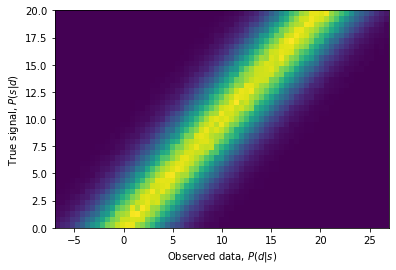

In [34]:
signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

h,x_edges,y_edges,image= plt.hist2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.ylabel('True signal, $P(s|d)$')
plt.xlabel('Observed data, $P(d|s)$')

##### Problem 1b
We generated a million signal values but the bin values are smaller. It is very unlikely to to observe the exact signal,accurate to the last decimal point (this resembles real-life scenarios). I thus pick the closest value to my signal in the simulated signal using <u> find_nearest </u> function and plot a horizontal slice. 


Signal ~15

In [35]:
def find_nearest(array, value):
    array = array
    idx = (np.abs(array - value)).argmin()
    return [idx,array[idx]]

In [36]:
val=15
i,s=find_nearest(signalcenters,val)
print ("Index:",i,";  Signal:",s)

Index: 29 ;  Signal: 15.128205128205128


In [37]:
h_slice=h.T[i]

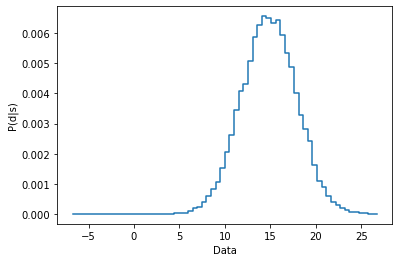

In [38]:
plt.step(datacenters,h_slice)
plt.xlabel("Data")
plt.ylabel("P(d|s)")
plt.show()

<u> Purpose </u>: Given a signal of some strength, what range of observations can that signal produce? <br>
<u> Observation </u>: P(d|s) is symmetric about ~15 and peaks at ~15. This was suggested by the 2d histogram as well with peaks following a line of slope ~1 and 0 shift. This is because our signal is unifrom and background is 0 mean.  </br>
<u> Interpretation </u>: The signal is equally likely to result in observations above and below 15 with a peak at 15. 

##### 1c

I pick the closest value to my observation in the data using find_nearest function ad plot a vertical slice. 

Observation ~10

33 10.0


Text(0, 0.5, 'P(s|d)')

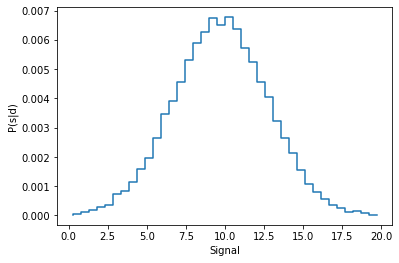

In [39]:
val=10
i,s=find_nearest(datacenters,val)
print (i,s)
v_slice=h[i]
plt.step(signalcenters,v_slice)
plt.xlabel("Signal")
plt.ylabel("P(s|d)")

<u> Purpose </u> : Given an observation, what range of signals can result in the observation? </br>
<u> Observation </u>: P(s|d) peaks at ~10. This was suggested by the 2d histogram as well with peaks following a line of slope ~1 and 0 mean at null signal. </br>
<u> Interpretation </u>: The observation is equally likely to be due to signals higher and lower than ~15 with a peak at ~15.

### Problem 2

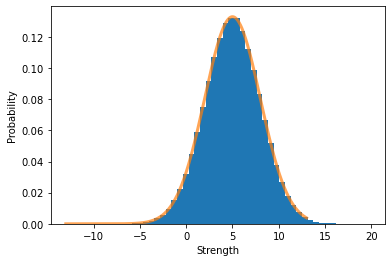

In [15]:
bkgd = stats.norm.rvs(loc = 5, scale=3, size = 1000000)
fig, ax = plt.subplots(1, 1)
ax.hist(bkgd,50, density=True)
#plt.xlim([2.95,3.05])
x = np.linspace(-13,13,1000)
ax.plot(x,stats.norm.pdf(x,loc = 5, scale = 3),linewidth = 3,alpha = 0.7)
plt.xlabel("Strength")
plt.ylabel("Probability")
plt.show()

In [16]:
data=signal+bkgd

Text(0.5, 0, 'Observed data, $P(d|s)$')

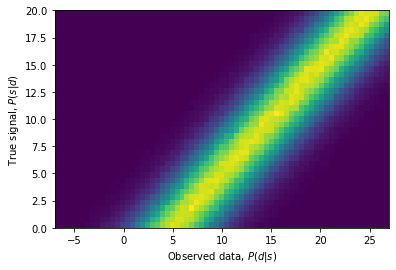

In [17]:
signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

h,x_edges,y_edges,image= plt.hist2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.ylabel('True signal, $P(s|d)$')
plt.xlabel('Observed data, $P(d|s)$')

Index: 23 ;  Signal: 12.051282051282051
Index: 37 ;  Data: 12.029850746268657


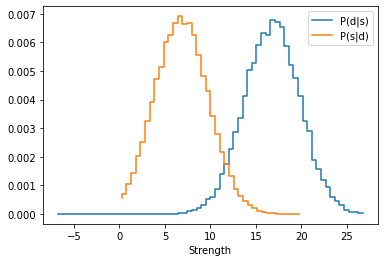

In [18]:
def find_nearest(array, value):
    array = array
    idx = (np.abs(array - value)).argmin()
    return [idx,array[idx]]
val=12
i,s=find_nearest(signalcenters,val)
h_slice=h.T[i]
print ("Index:",i,";  Signal:",s)

def find_nearest(array, value):
    array = array
    idx = (np.abs(array - value)).argmin()
    return [idx,array[idx]]

i,s=find_nearest(datacenters,val)
print ("Index:",i,";  Data:",s)
v_slice=h[i]

plt.step(datacenters,h_slice,label="P(d|s)")
plt.step(signalcenters,v_slice,label="P(s|d)")
plt.xlabel("Strength")
plt.legend()
plt.show()

The graphs appear to be mirrored about 12 and are not centered at the same value. This is because our background is not centered at 0. Background+signal gives observations' mean shifted to the right than the actual signal. This is why P(d|s) or the horizontal slice shifts to the right. Consequently, A given observation is more likely to be a result of signals lower than the observation because of the rightward shift in signal mean. The shift in graphs is ~5 in each direction due to the new mean being 5.